In [19]:
from PIL import Image,ImageOps
class deformer():
    def getmesh(self,img):
        w,h = img.size
        sourch_shpae = (0,0,0,h,w,h,w,0)
        target_rect = (0,0,w,h)
        return [(target_rect,sourch_shpae)]

image = Image.open('1.jpeg')
deform = ImageOps.deform(image,deformer())
deform.show()

In [43]:
from PIL import Image,ImageOps
class deformer():
    def getmesh(self,img):
        w,h = img.size
        left = ((0,0,w // 2, h),(0, 0, 0, h, w // 2, h, w // 2 , 0))
        right =((w // 2,0,w,h),(w // 2, 0, w // 2, h, 0, h, 0 , 0))
        flip = ((w // 2, 0, w, h ),(w // 2, h, w // 2, 0, w, 0, w - 1000 , h))
        return [left,flip]

image = Image.open('1.jpeg')
deform = ImageOps.deform(image,deformer())
# deform.show()

# wave

In [45]:
class SingleDeformer:

    def getmesh(self, img):
        #Map a target rectangle onto a source quad
        return [(
                # target rectangle
                (200, 100, 300, 200),
                # corresponding source quadrilateral
                (0, 0, 0, 100, 100, 200, 100, 0)
                )]
image = Image.open('1.jpeg')
deform = ImageOps.deform(image, SingleDeformer())

In [50]:
import math
class WaveDeformer:

    def transform(self, x, y):
        y = y + 10*math.sin(x/40)
        return x, y

    def transform_rectangle(self, x0, y0, x1, y1):
        return (*self.transform(x0, y0),
                *self.transform(x0, y1),
                *self.transform(x1, y1),
                *self.transform(x1, y0),
                )

    def getmesh(self, img):
        self.w, self.h = img.size
        gridspace = 20

        target_grid = []
        for x in range(0, self.w, gridspace):
            for y in range(0, self.h, gridspace):
                target_grid.append((x, y, x + gridspace, y + gridspace))

        source_grid = [self.transform_rectangle(*rect) for rect in target_grid]

        return [t for t in zip(target_grid, source_grid)]
deform = ImageOps.deform(image, WaveDeformer())

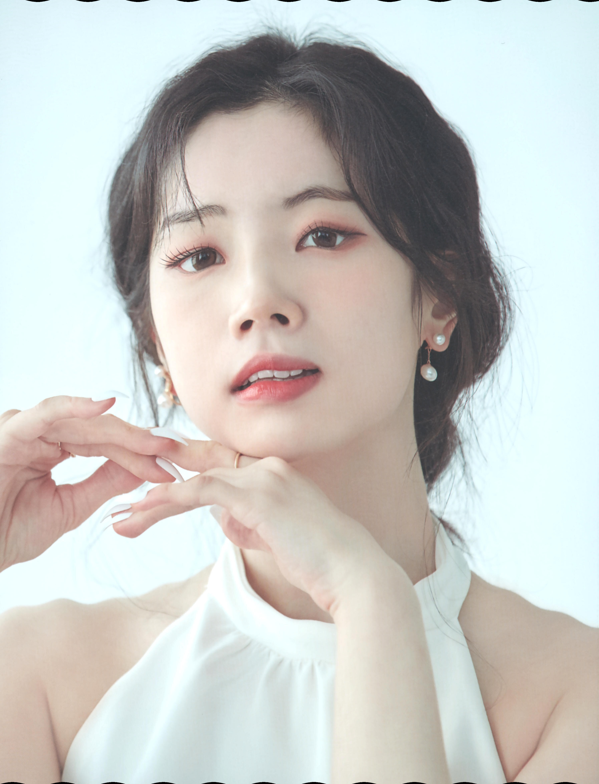

In [52]:
# Define the new size you want for the deformed image
s = 5
new_width = image.size[0]//s
new_height = image.size[1]//s

# Resize the deformed image
deform_resized = deform.resize((new_width, new_height))
deform_resized

In [53]:
deform_resized.save('save.png')